In [1]:
# @author : Gaurav Kabra

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [3]:
import pandas as pd
suv = pd.read_csv("../input/suv-data/suv_data.csv")

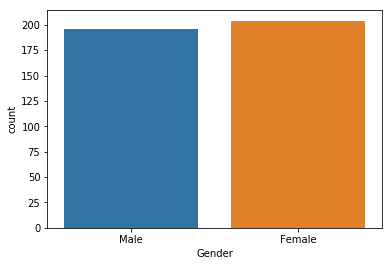

In [4]:
sns.countplot(suv['Gender'])

In [5]:
suv.drop('User ID', inplace=True, axis=1)

In [6]:
gender = pd.get_dummies(suv['Gender'], drop_first=True)

In [7]:
suv = pd.concat([suv,gender], axis=1)
suv.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [8]:
suv.drop('Gender',axis=1,inplace=True)

In [9]:
suv.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [10]:
# scaling is required
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

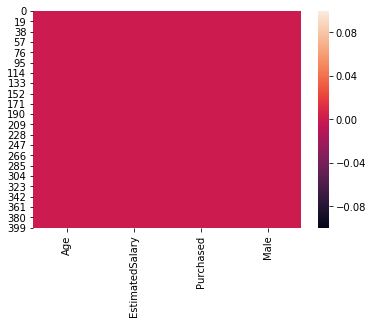

In [11]:
sns.heatmap(suv.isnull())

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [13]:
X = suv.drop('Purchased',axis=1)
y = suv['Purchased']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
pred = logmodel.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
accuracy_score(y_test,pred)

0.8875